# **Music genre Classification**
---
Pablo Gavilán Estepa (105550)

Álvaro San Emeterio Valdes


## Task 1
** Design a k-NN classifier (k=5) for all ten genres using only the following four features; spectral rolloff mean, mfcc 1 mean, spectral centroid mean and tempo. Evaluate the performance of the classification model.**

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accuracy scores for each fold: [0.32323232 0.42424242 0.28282828 0.25252525 0.39393939 0.29292929
 0.33333333 0.34343434 0.29292929 0.47474747]
Mean CV accuracy: 0.3414141414141414
Accuracy without cross_val: 0.35858585858585856


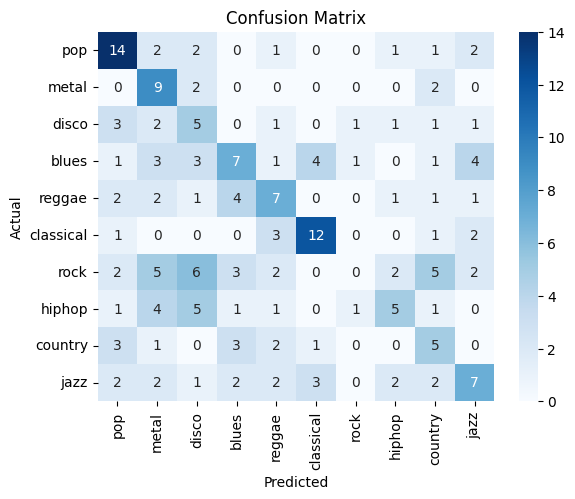

              precision    recall  f1-score   support

         pop       0.48      0.61      0.54        23
       metal       0.30      0.69      0.42        13
       disco       0.20      0.33      0.25        15
       blues       0.35      0.28      0.31        25
      reggae       0.35      0.37      0.36        19
   classical       0.60      0.63      0.62        19
        rock       0.00      0.00      0.00        27
      hiphop       0.42      0.26      0.32        19
     country       0.25      0.33      0.29        15
        jazz       0.37      0.30      0.33        23

    accuracy                           0.36       198
   macro avg       0.33      0.38      0.34       198
weighted avg       0.33      0.36      0.33       198

Accuracy: 0.35858585858585856


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data
data = pd.read_csv('/content/drive/MyDrive/Music Genre Classification/GenreClassData_30s.txt', sep = "\t")

# Feature selection and normalization
# Imputation of missing values
imputer = SimpleImputer(strategy='mean')
features = ['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo']
data[features] = imputer.fit_transform(data[features])

# Preparation of features and labels
X = data[features]
y = data['GenreID']

# Data normalization
X_normalized = StandardScaler().fit_transform(X)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# k-NN model creation and training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Cross-validation with 10 folds
cv_scores = cross_val_score(knn, X_normalized, y, cv=10)
print("Accuracy scores for each fold:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Prediction and evaluation
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy without cross_val:', accuracy)

'''CONFUSION MATRIX AND CLASSIFICATION REPORT'''

# Confusion Matrix
genre_names = data[['GenreID', 'Genre']].drop_duplicates().sort_values(by='GenreID')['Genre'].tolist()
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Clasification Report
print(classification_report(y_test, y_pred, target_names=genre_names))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

## TASK 2:
**For each of the four features; spectral rolloff mean, mfcc 1 mean, spec- tral centroid mean and tempo, compare the feature distribution for the four classes; pop, disco, metal and classical. Analyze how the feature distribution relates to the performance of your classifier.**

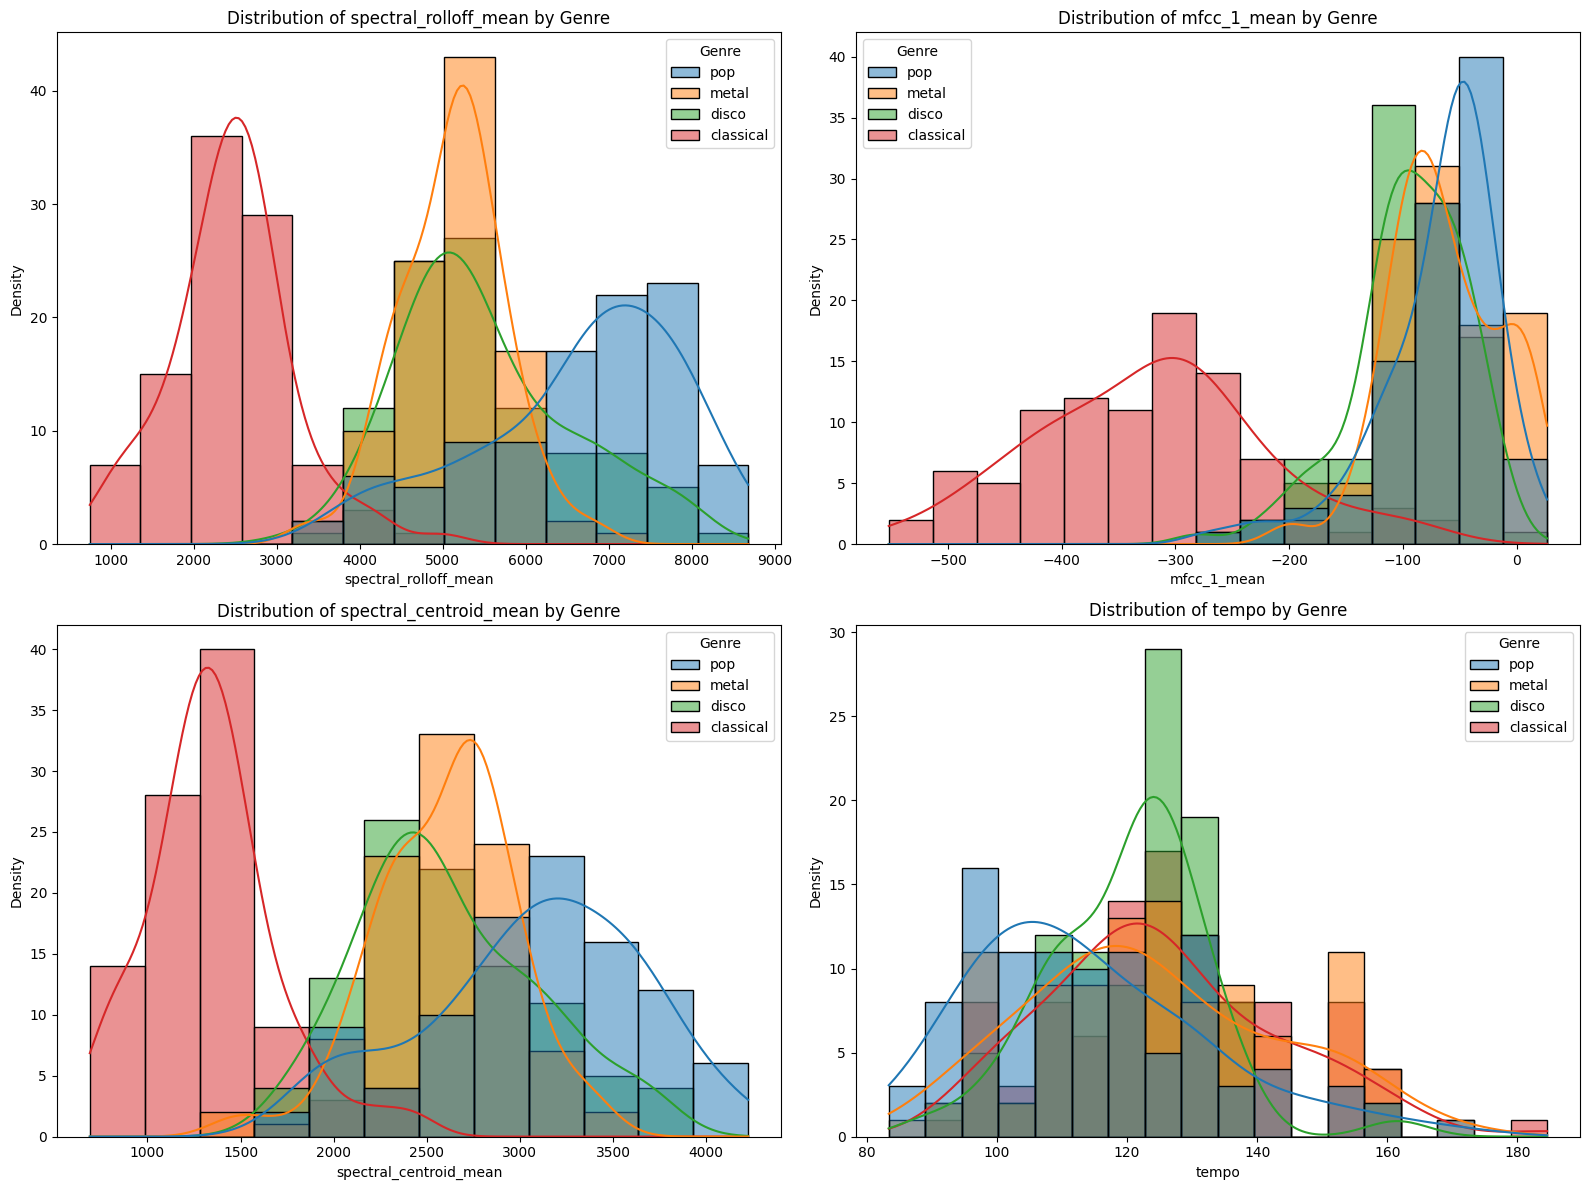

In [42]:
# Filtrar el dataset para incluir solo las clases seleccionadas
selected_genres = ['pop', 'disco', 'metal', 'classical']
filtered_data = data[data['Genre'].isin(selected_genres)]

# Lista de las características a analizar
features = ['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo']

# Graficar las distribuciones de las características para los géneros seleccionados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=filtered_data, x=feature, hue='Genre', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Genre')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Ejercicio 3:  Design a k-NN classifier (k=5) for all ten genres using only four features with at least three features being; spectral rolloff mean, mfcc 1 mean, spectral centroid mean or tempo. Motivate why you selected the particular four features.

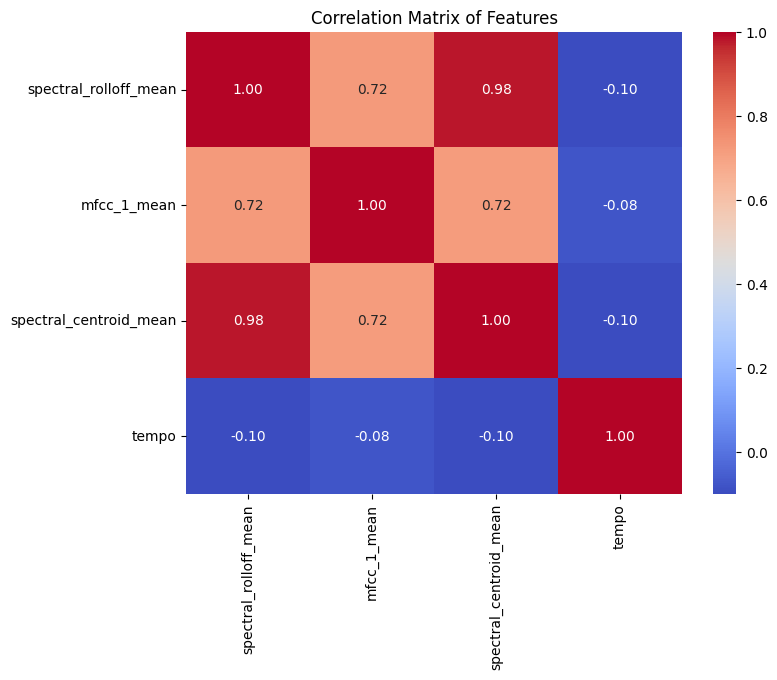

                    Feature       Score
39              mfcc_1_mean  133.559677
6   spectral_bandwidth_mean  118.284554
5     spectral_centroid_var  112.916999
8     spectral_rolloff_mean  111.967406
4    spectral_centroid_mean   98.132224
3                  rmse_var   91.089895
40              mfcc_2_mean   84.341466
1       zero_cross_rate_std   84.271033
42              mfcc_4_mean   83.838068
11    spectral_contrast_var   75.441545


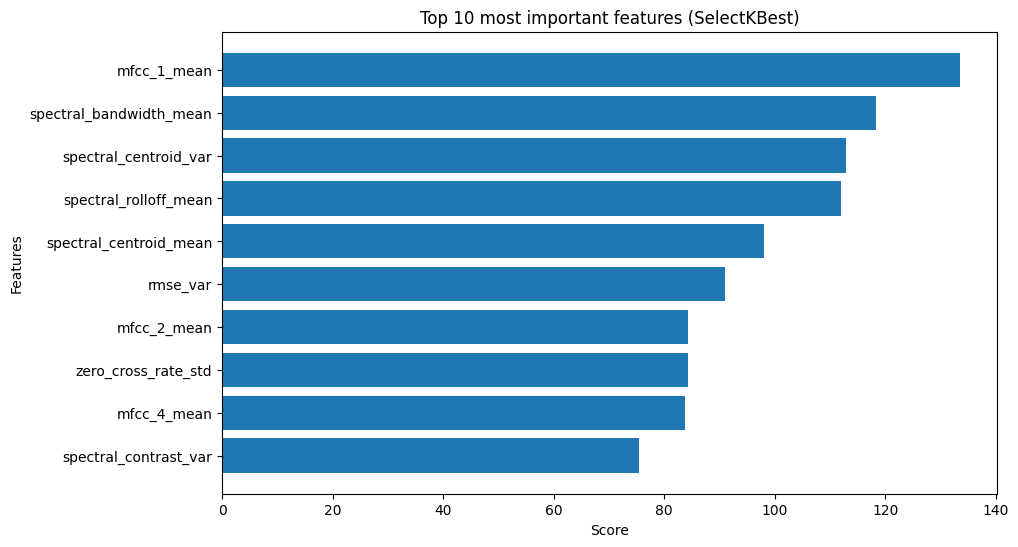

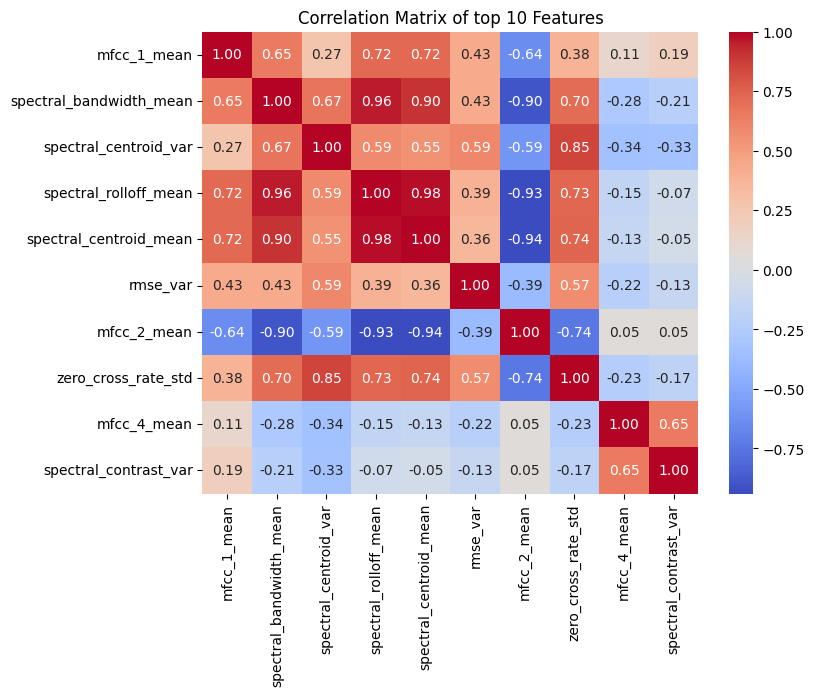

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
# Selecting three required features
features = ['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo']

# We need to choose a fourth feature. Let's analyze the correlations to make an informed decision.
correlation_matrix = data[features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Selecting columns
columns_to_drop = ['GenreID', 'Genre', 'Type', 'Track ID', 'File']
features = [col for col in data.columns if col not in columns_to_drop]

# Making sure there are no NaN or infinite values in the columns
data[features] = data[features].replace([np.inf, -np.inf], np.nan)
data[features] = data[features].fillna(data[features].mean())

X = data[features].values
y = data['GenreID'].values

# Fitting SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Now we should get a score for each feature
scores30s = selector.scores_

# Creating DataFrame
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores30s})

# Sorting and displaying results
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Selecting the top 10 features
top_10_features = feature_scores.head(10)

# Printing the top 10 features
print(top_10_features)

# Visualizing the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Score'])
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Top 10 most important features (SelectKBest)')
plt.gca().invert_yaxis()  # Invert the y-axis so that the most important feature is at the top
plt.show()

correlation_matrix = data[top_10_features['Feature']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of top 10 Features')
plt.show()


Accuracy without cross_val: 0.4292929292929293


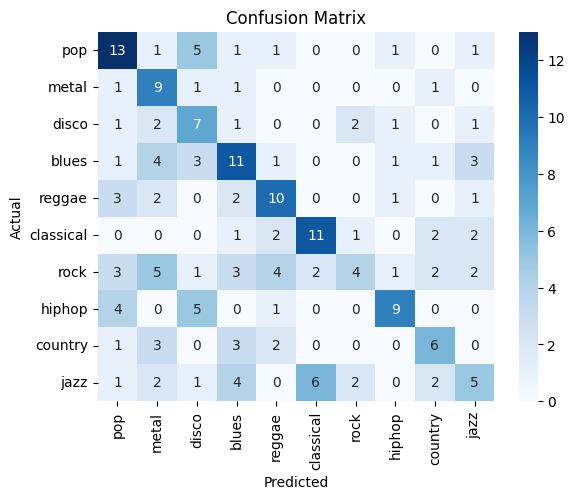

              precision    recall  f1-score   support

         pop       0.46      0.57      0.51        23
       metal       0.32      0.69      0.44        13
       disco       0.30      0.47      0.37        15
       blues       0.41      0.44      0.42        25
      reggae       0.48      0.53      0.50        19
   classical       0.58      0.58      0.58        19
        rock       0.44      0.15      0.22        27
      hiphop       0.64      0.47      0.55        19
     country       0.43      0.40      0.41        15
        jazz       0.33      0.22      0.26        23

    accuracy                           0.43       198
   macro avg       0.44      0.45      0.43       198
weighted avg       0.44      0.43      0.42       198

Accuracy: 0.4292929292929293


In [44]:
# Feature selection and normalization
# Imputation of missing values
imputer = SimpleImputer(strategy='mean')
features = ['spectral_centroid_mean', 'mfcc_1_mean', 'rmse_var', 'tempo']
data[features] = imputer.fit_transform(data[features])

# Preparation of features and labels
X = data[features]
y = data['GenreID']

# Data Normalization
X_normalized = StandardScaler().fit_transform(X)

# Data division
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Setting and fitting the k-NN model
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)

# Prediction and evaluation
y_pred = knn3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy without cross_val:', accuracy)

# Confusion Matrix
genre_names = data[['GenreID', 'Genre']].drop_duplicates().sort_values(by='GenreID')['Genre'].tolist()
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=genre_names))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Task4:
**Design a classifier for all ten genres that classifies the audio tracks, each represented by a Track ID. You are allowed to use any classifier, as many features as you like and all of the available data sets GenreClassData 5s.txt, GenreClassData 10s.txt, and GenreClassData 30s.txt as input data.**


In [45]:
data30s = pd.read_csv('/content/drive/MyDrive/Music Genre Classification/GenreClassData_30s.txt', sep = "\t")
data5s = pd.read_csv('/content/drive/MyDrive/Music Genre Classification/GenreClassData_5s.txt', sep = "\t")
data10s = pd.read_csv('/content/drive/MyDrive/Music Genre Classification/GenreClassData_10s.txt', sep = "\t")

#Feature Selection

In this part of the code, we're going to iterate through each type of feature, seeing which one can help us the most. We'll do this using a 'score'.

The "score" in this context refers to the ANOVA F-value score of each feature. The higher the score, the more likely the feature has a statistically significant relationship with the target variable you're trying to predict.

# MFCC's

In [46]:
data = pd.read_csv('/content/drive/MyDrive/Music Genre Classification/GenreClassData_5s.txt', sep="\t")
from sklearn.feature_selection import SelectKBest, f_classif
# Selecting MFCC columns
mfcc_features = [col for col in data.columns if 'mfcc' in col]

# Making sure there are no NaN or infinite values in the MFCC columns
data[mfcc_features] = data[mfcc_features].replace([np.inf, -np.inf], np.nan)
data[mfcc_features] = data[mfcc_features].fillna(data[mfcc_features].mean())

X = data[mfcc_features].values
y = data['GenreID'].values

# Fitting SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Now we should get a score for each MFCC feature
scores = selector.scores_

# Creating DataFrame
feature_scores = pd.DataFrame({'Feature': mfcc_features, 'Score': scores})

# Sorting and displaying results
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

         Feature       Score
0    mfcc_1_mean  694.490370
1    mfcc_2_mean  471.302633
3    mfcc_4_mean  421.266786
17    mfcc_6_std  343.759277
15    mfcc_4_std  341.303123
16    mfcc_5_std  334.493739
7    mfcc_8_mean  333.380882
5    mfcc_6_mean  323.164388
8    mfcc_9_mean  288.320098
18    mfcc_7_std  278.636360
6    mfcc_7_mean  239.887862
14    mfcc_3_std  223.696477
11  mfcc_12_mean  222.115118
2    mfcc_3_mean  216.354551
19    mfcc_8_std  193.845944
9   mfcc_10_mean  186.504612
12    mfcc_1_std  182.370463
4    mfcc_5_mean  177.514166
13    mfcc_2_std  163.408947
10  mfcc_11_mean  155.035481
21   mfcc_10_std  149.953108
20    mfcc_9_std  146.041333
22   mfcc_11_std  109.279631
23   mfcc_12_std   85.264227


#Chroma's

In [47]:
# Select Chroma columns
chroma_features = [col for col in data.columns if 'chroma' in col]

# Ensure there are no NaN or infinite values in the Chroma columns
data[chroma_features] = data[chroma_features].replace([np.inf, -np.inf], np.nan)
data[chroma_features] = data[chroma_features].fillna(data[chroma_features].mean())

X = data[chroma_features].values
y = data['GenreID'].values

# Fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Now we should get a score for each Chroma feature
scores = selector.scores_

# Create DataFrame
feature_scores = pd.DataFrame({'Feature': chroma_features, 'Score': scores})

# Sort and display results
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                Feature       Score
1    chroma_stft_2_mean  259.118801
8    chroma_stft_9_mean  257.644307
6    chroma_stft_7_mean  253.396580
4    chroma_stft_5_mean  233.521099
3    chroma_stft_4_mean  230.749065
11  chroma_stft_12_mean  206.484763
9   chroma_stft_10_mean  169.763202
10  chroma_stft_11_mean  166.165509
7    chroma_stft_8_mean  150.567038
5    chroma_stft_6_mean  143.211285
2    chroma_stft_3_mean  126.387477
0    chroma_stft_1_mean  125.865672
13    chroma_stft_2_std  108.255178
18    chroma_stft_7_std  101.317138
20    chroma_stft_9_std   79.033043
15    chroma_stft_4_std   77.680799
23   chroma_stft_12_std   67.517153
22   chroma_stft_11_std   64.420614
17    chroma_stft_6_std   46.201452
16    chroma_stft_5_std   38.383556
12    chroma_stft_1_std   36.207644
21   chroma_stft_10_std   26.887065
19    chroma_stft_8_std   22.834842
14    chroma_stft_3_std   21.598747


#Spectral's


In [48]:
# Select Spectral columns
spectral_features = [col for col in data.columns if 'spectral' in col]

# Ensure there are no NaN or infinite values in the Spectral columns
data[spectral_features] = data[spectral_features].replace([np.inf, -np.inf], np.nan)
data[spectral_features] = data[spectral_features].fillna(data[spectral_features].mean())

X = data[spectral_features].values
y = data['GenreID'].values

# Fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Now we should get a score for each Spectral feature
scores = selector.scores_

# Create DataFrame
feature_scores = pd.DataFrame({'Feature': spectral_features, 'Score': scores})

# Sort and display results
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                   Feature       Score
2  spectral_bandwidth_mean  649.992560
4    spectral_rolloff_mean  603.421237
1    spectral_centroid_var  555.880145
0   spectral_centroid_mean  522.937604
7    spectral_contrast_var  440.081409
9    spectral_flatness_var  414.556271
5     spectral_rolloff_var  400.828395
6   spectral_contrast_mean  316.822977
3   spectral_bandwidth_var  240.756540
8   spectral_flatness_mean  240.180285


# Rest of the Features

In [49]:
# Select Spectral columns
zero_or_rmse_features = [col for col in data.columns if col.startswith('zero') or col.startswith('rmse') or col.startswith('tempo')]

# Ensure there are no NaN or infinite values in the Spectral columns
data[zero_or_rmse_features] = data[zero_or_rmse_features].replace([np.inf, -np.inf], np.nan)
data[zero_or_rmse_features] = data[zero_or_rmse_features].fillna(data[zero_or_rmse_features].mean())

X = data[zero_or_rmse_features].values
y = data['GenreID'].values

# Fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Now we should get a score for each Spectral feature
scores = selector.scores_

# Create DataFrame
feature_scores = pd.DataFrame({'Feature': zero_or_rmse_features, 'Score': scores})

# Sort and display results
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                Feature       Score
3              rmse_var  521.535663
2             rmse_mean  411.137734
1   zero_cross_rate_std  361.427827
0  zero_cross_rate_mean  289.818859
4                 tempo   41.629742


#Review of all features

                    Feature       Score
39              mfcc_1_mean  694.490370
6   spectral_bandwidth_mean  649.992560
8     spectral_rolloff_mean  603.421237
5     spectral_centroid_var  555.880145
4    spectral_centroid_mean  522.937604
3                  rmse_var  521.535663
40              mfcc_2_mean  471.302633
11    spectral_contrast_var  440.081409
42              mfcc_4_mean  421.266786
13    spectral_flatness_var  414.556271


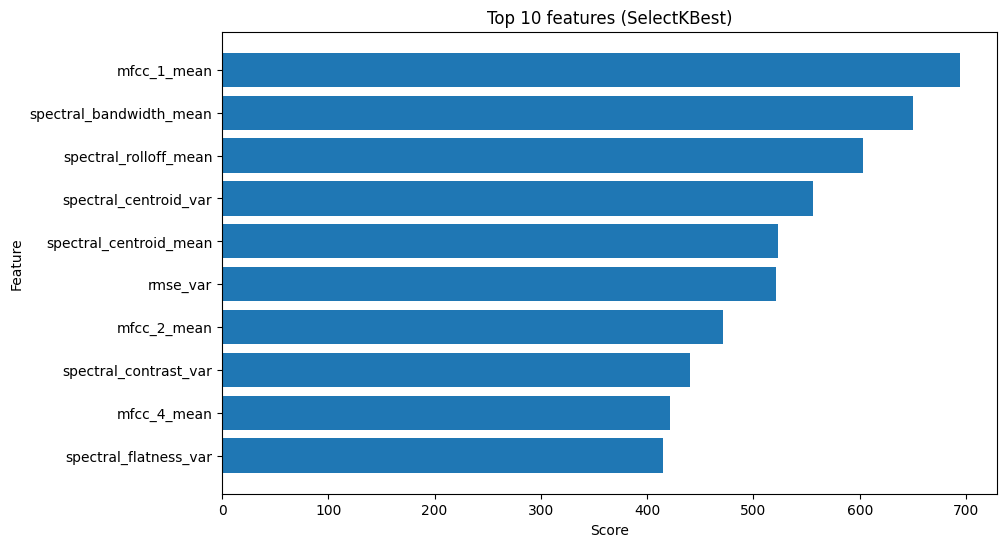

In [50]:
# Select columns
columns_to_drop = ['GenreID', 'Genre', 'Type', 'Track ID', 'File']
features = [col for col in data.columns if col not in columns_to_drop]

# Ensure there are no NaN or infinite values in the columns
data[features] = data[features].replace([np.inf, -np.inf], np.nan)
data[features] = data[features].fillna(data[features].mean())

X = data[features].values
y = data['GenreID'].values

# Fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Now we should get a score for each feature
scores30s = selector.scores_

# Create DataFrame
feature_scores_30s = pd.DataFrame({'Feature': features, 'Score': scores30s})

# Sort and display results
feature_scores_30s = feature_scores_30s.sort_values(by='Score', ascending=False)

# Select the top 10 features
top_10_features_30s = feature_scores_30s.head(10)

# Print the top 10 features
print(top_10_features_30s)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_30s['Feature'], top_10_features_30s['Score'])
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 features (SelectKBest)')
plt.gca().invert_yaxis()  # Invert the y-axis so that the most important feature is at the top
plt.show()

data = pd.read_csv('/content/drive/MyDrive/Music Genre Classification/GenreClassData_5s.txt', sep = "\t")

#CNN


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               5632      
                                                                 
 dropout_48 (Dropout)        (None, 512)               0         
                                                                 
 dense_61 (Dense)            (None, 256)               131328    
                                                                 
 dropout_49 (Dropout)        (None, 256)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)              

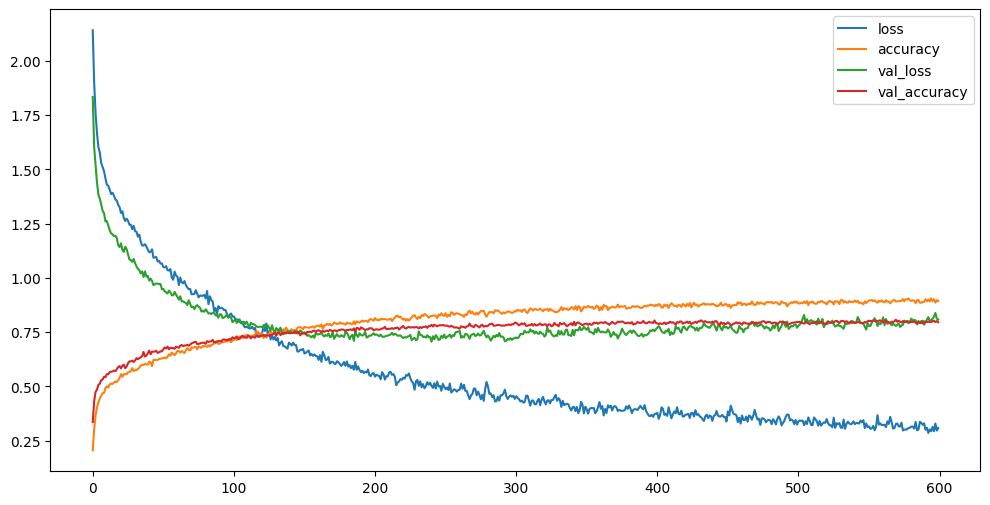

In [51]:
# IMPORT LIBRARIES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout

data = pd.read_csv('/content/drive/MyDrive/Music Genre Classification/GenreClassData_5s.txt', sep="\t")

features = ['mfcc_1_mean',
            'chroma_stft_2_mean',
            'spectral_bandwidth_mean', 'spectral_rolloff_mean', 'spectral_centroid_mean',
            'rmse_var', 'rmse_mean',
            'zero_cross_rate_std', 'zero_cross_rate_mean',
            'tempo' ]
X = data[features]

#Apply scaling to numerical features
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(X.astype(float))

#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#Building the model

from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt

def trainModel(model, epochs, optimizer):
    batch_size = 128
    #callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model, epochs=600, optimizer='adam')
plotValidate(model_history)

16/16 [==============================] - 0s 3ms/step - loss: 0.8083 - accuracy: 0.7955
The test Loss is:  0.8082960844039917
The best test Accuracy is:  79.55124974250793
62/62 [==============================] - 0s 3ms/step

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       217
           1       0.91      0.90      0.91       202
           2       0.75      0.83      0.79       193
           3       0.80      0.74      0.77       193
           4       0.76      0.80      0.78       202
           5       0.90      0.97      0.93       206
           6       0.71      0.67      0.69       183
           7       0.85      0.84      0.84       168
           8       0.68      0.66      0.67       205
           9       0.73      0.78      0.75       192

    accuracy                           0.80      1961
   macro avg       0.80      0.79      0.79      1961
weighted avg       0.80      0.80      0.79     

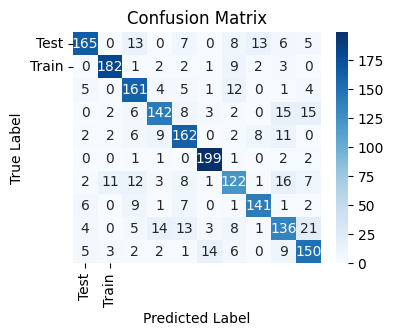

In [52]:
# Model Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is: ", test_loss)
print("The best test Accuracy is: ", test_acc*100)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Model predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred_labels))

# Visualization of the confusion matrix
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_labels)

# Retrieving class labels from the LabelEncoder
from sklearn.preprocessing import LabelEncoder
genre_labels = convertor.classes_

# Visualization of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genre_labels, yticklabels=genre_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()